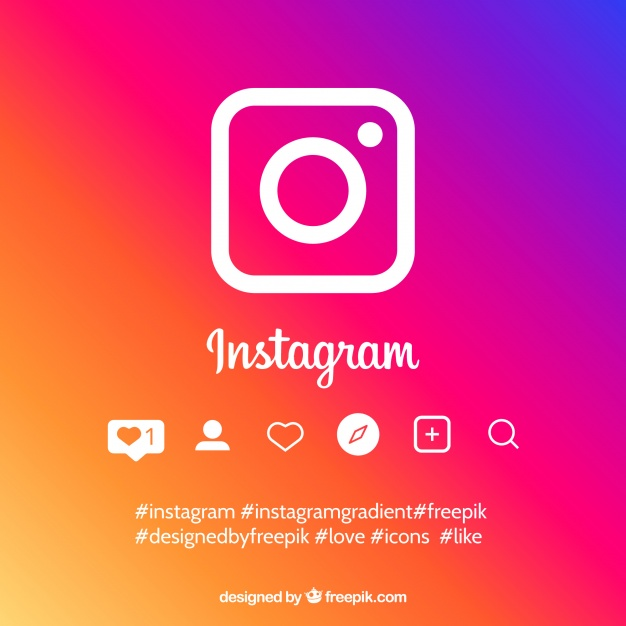
Have you looked at your Instagram numbers lately? Perhaps you keep track of your likes or have an idea of your month-to-month follower growth. But have you really explored the analytics and sifted through that data? If the answer is no, you may want to explore this Notebook on how to analyise your account extensively. 

Instagram Insights help you learn more about your followers and the people interacting with your business on Instagram.

You can see which posts and stories your audience sees and engages with the most.

In [9]:
# Import Instagram api
from instabot import Bot
# For data manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from pandas.io.json import json_normalize
# To prevent overflooding of requests
import time
# to handle date and time
from datetime import datetime, timedelta, timezone
# For visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
# Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load data
df_posts = pd.read_csv('posts.csv', parse_dates= ['post_time'])
df_likers = pd.read_csv('likers.csv')
df_com = pd.read_csv('commenters.csv', parse_dates= ['comment_time'])

# Exploratory Data analysis

## Univariate analysis

Image Count:  261
Video Count:  89
GIF Count:  37


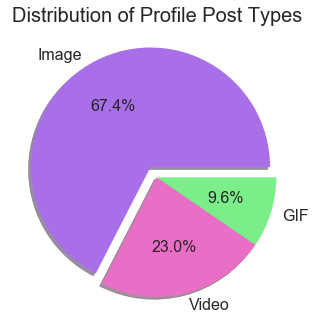

In [14]:
# Media type of posts
print('Image Count: ', len(df_posts[df_posts['media_type'] == 'Image']))
print('Video Count: ', len(df_posts[df_posts['media_type'] == 'Video']))
print('GIF Count: ', len(df_posts[df_posts['media_type'] == 'GIF']))

ax = df_posts['media_type'].value_counts().plot.pie(shadow= True, autopct='%1.1f%%', explode= (0.1, 0, 0),\
                        colors= ['#A96FE9', '#E96FC6', '#7CEE89'], textprops={'fontsize': 16})
ax.set_ylabel('')
ax.set_title('Distribution of Profile Post Types', fontsize= 20)
plt.savefig('Distribution of Profile Post Types.jpg')

Distribution of posts among Image, Video and GIF. This gives us an idea of the type of content the Instagram account is known for posting. Change in distribution over time let us find relation with the engagement rate of the account. For e.g: if posting more images increase the engagement of users then the above distribution of media should be maintained in future too.

In [15]:
# Filter applied on the post
print('Number of Posts with filters: ', len(df_posts[df_posts['filter_type'] != 'No filter']))
# Not enough data

Number of Posts with filters:  2


This is the number of posts applied with filters. This number is usually high for accounts in fashion industry.

In [16]:
# caption edited or not
df_posts['caption_is_edited'].value_counts()
# no idea right now

False    380
True       7
Name: caption_is_edited, dtype: int64

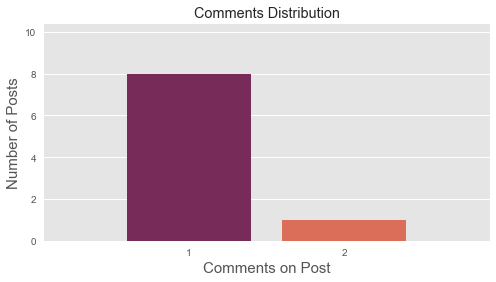

In [17]:
# comment count
fig, ax = plt.subplots(1, 1, figsize= (8, 4))
sns.countplot(df_posts[df_posts['comment_count'] > 0].comment_count, palette= 'rocket', ax=ax)
ax.set_xlabel('Comments on Post', fontsize= 15)
ax.set_ylabel('Number of Posts', fontsize= 15)
ax.set_title('Comments Distribution')
plt.margins(0.3)
plt.savefig('Comments Distribution.png')
# not enough data for further statistics

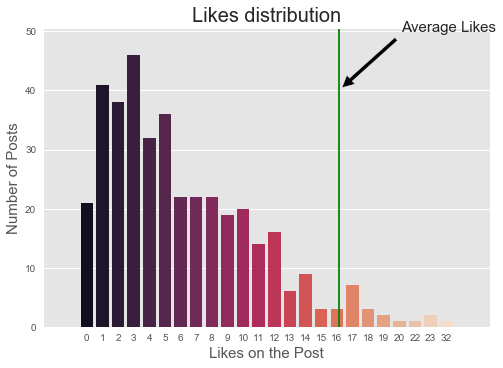

In [18]:
# likes count
sns.barplot(df_posts['like_count'].value_counts().index,df_posts['like_count'].value_counts().values, \
            palette= 'rocket', orient= 'v')
plt.xlabel('Likes on the Post', fontsize= 15)
plt.ylabel('Number of Posts', fontsize= 15)
plt.title('Likes distribution', fontsize= 20)
plt.margins(0.1)
mean = np.mean(df_posts['like_count'].value_counts().values)
plt.annotate('Average Likes', xy=(mean, 40), xytext=(mean+ 4, 50),fontsize= 15,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.axvline(x= mean, color= 'green')
plt.savefig('Likes distribution.png')

In [ ]:
# Boost status
# no post boosted

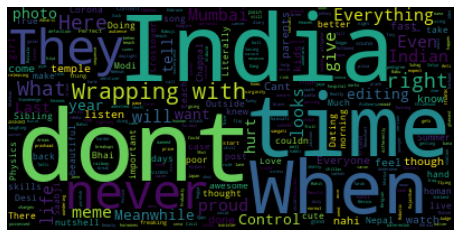

In [19]:
# Caption
import re
caption = df_posts['caption'].dropna().tolist()
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

caption = list(map(deEmojify, caption))

# create wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


wc = WordCloud(max_words= 300000, min_word_length= 4).generate(' '.join(caption))

plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.savefig('wordcloud_of_captions.png')

In [23]:
# length of caption
import spacy
nlp = spacy.load('en_core_web_sm')
word_len = list(map(lambda x: len(nlp(x)), caption))

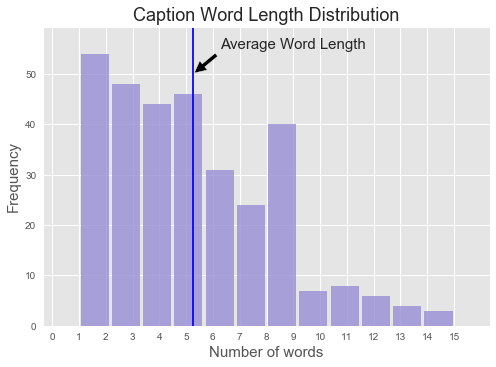

In [24]:
ax = sns.distplot(word_len, kde= False,color= sns.color_palette()[2],\
             hist_kws= { 'alpha': 0.8, 'rwidth': 0.9})
ax.set_xticks(np.arange(0, 16))
ax.set_xlabel('Number of words', fontsize= 15)
ax.set_ylabel('Frequency', fontsize= 15)
ax.set_title('Caption Word Length Distribution', fontsize= 18)
plt.margins(0.1)
mean = np.mean(word_len)
plt.annotate('Average Word Length', xy=(mean, 50), xytext=(mean+ 1, 55),fontsize= 15,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.axvline(x= mean, color= 'blue')
plt.savefig('Caption Word Length Distribution.png')

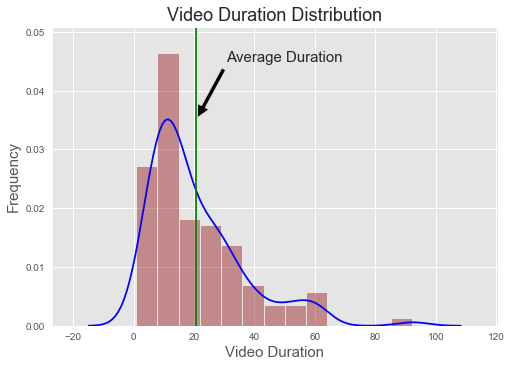

In [25]:
# video duration
sns.distplot(df_posts[df_posts['video_duration'] > 0].video_duration,\
             hist_kws= {'rwidth': 0.95, 'color': 'darkred'}, kde_kws= { 'color': 'blue'})
plt.xlabel('Video Duration', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.title('Video Duration Distribution', fontsize= 18)
plt.margins(0.1)
mean = np.mean(df_posts[df_posts['video_duration'] > 0].video_duration)
plt.annotate('Average Duration', xy=(mean, 0.035), xytext=(mean+ 10, 0.045),fontsize= 15,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.axvline(x= mean, color= 'green')
plt.savefig('Video Duration Distribution.png')

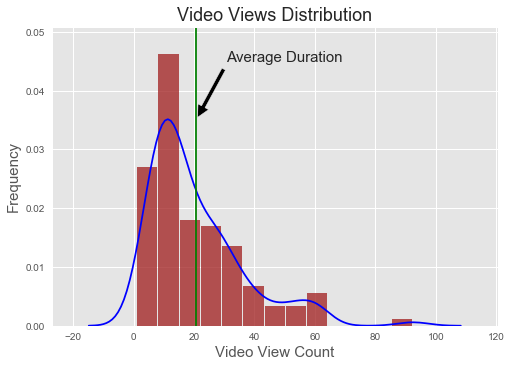

In [26]:
# video views
sns.distplot(df_posts[df_posts['view_count'] > 0].video_duration,\
             hist_kws= {'rwidth': 0.95, 'color': 'brown', 'alpha': 0.8}, kde_kws= { 'color': 'blue'})
plt.xlabel('Video View Count', fontsize= 15)
plt.ylabel('Frequency', fontsize= 15)
plt.title('Video Views Distribution', fontsize= 18)
plt.margins(0.1)
mean = np.mean(df_posts[df_posts['view_count'] > 0].video_duration)
plt.annotate('Average Duration', xy=(mean, 0.035), xytext=(mean+ 10, 0.045),fontsize= 15,
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.axvline(x= mean, color= 'green')
plt.savefig('Video Views Distribution.png')

In [27]:
# time series analysis
# take out hour, day of week, day of month and month
df_posts['hour'] = df_posts['post_time'].dt.hour
df_posts['weekday'] = df_posts['post_time'].dt.weekday
df_posts['day_of_month'] = df_posts['post_time'].dt.day
df_posts['month'] = df_posts['post_time'].dt.month
df_posts['date'] = df_posts['post_time'].dt.date

In [253]:
# correct weekday
days = {0 : 'Moday',
       1: 'Tuesday',
       2: 'Wednesday',
       3: 'Thursday',
       4: 'Friday',
       5: 'Saturday',
       6: 'Sunday'}
df_posts['weekday'] = df_posts['weekday'].map(days)

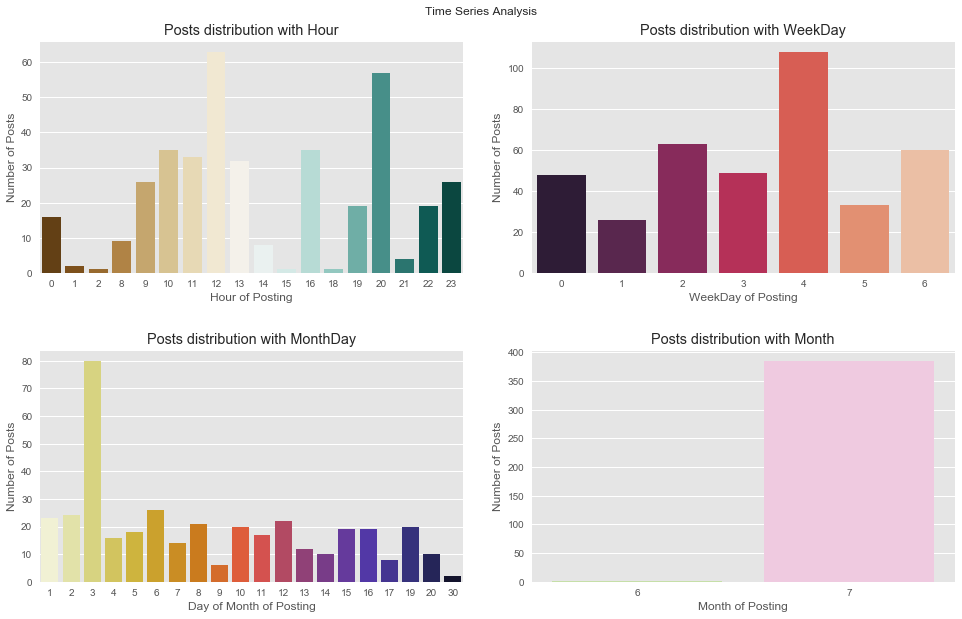

In [113]:
# plot different samples of time
fig, ax = plt.subplots(nrows= 2, ncols= 2, figsize= (14, 9))
# hour 
sns.barplot(df_posts['hour'].value_counts().index,df_posts['hour'].value_counts(), \
            palette= 'BrBG', orient= 'v', ax = ax[0][0])
ax[0][0].set_xlabel('Hour of Posting')
ax[0][0].set_ylabel('Number of Posts')
ax[0][0].set_title('Posts distribution with Hour')

# weekday
sns.barplot(df_posts['weekday'].value_counts().index,df_posts['weekday'].value_counts(), \
            palette= 'rocket', orient= 'v', ax = ax[0][1])
ax[0][1].set_xlabel('WeekDay of Posting')
ax[0][1].set_ylabel('Number of Posts')
ax[0][1].set_title('Posts distribution with WeekDay')

# Day of month
sns.barplot(df_posts['day_of_month'].value_counts().index,df_posts['day_of_month'].value_counts(), \
            palette= 'CMRmap_r', orient= 'v', ax = ax[1][0])
ax[1][0].set_xlabel('Day of Month of Posting')
ax[1][0].set_ylabel('Number of Posts')
ax[1][0].set_title('Posts distribution with MonthDay')


# Month
sns.barplot(df_posts['month'].value_counts().index,df_posts['month'].value_counts(), \
            palette= 'PiYG_r', orient= 'v', ax = ax[1][1])
ax[1][1].set_xlabel('Month of Posting')
ax[1][1].set_ylabel('Number of Posts')
ax[1][1].set_title('Posts distribution with Month')
fig.suptitle('Time Series Analysis')
fig.tight_layout(pad=3.0)
plt.savefig('Time Series Analysis.png')

In [ ]:
# only one video on igtv
# so not sufficient data

### Likers Data set

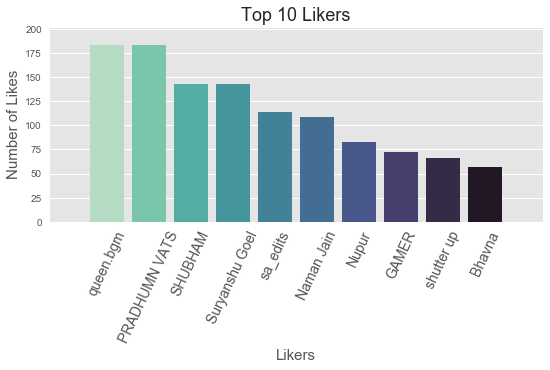

In [29]:
# likers distibution
sns.barplot(df_likers['full_name'].value_counts().index[:10],df_likers['full_name'].value_counts()[:10], \
            palette= 'mako_r', orient= 'v')
plt.xlabel('Likers', fontsize= 15)
plt.ylabel('Number of Likes', fontsize= 15)
plt.title('Top 10 Likers', fontsize= 18)
plt.xticks(rotation= 65, fontsize= 14)
plt.margins(0.1)
plt.tight_layout(pad= 2)
plt.savefig('Top 10 Likers.png')

Private Likers:  726
Public Likers:  1643


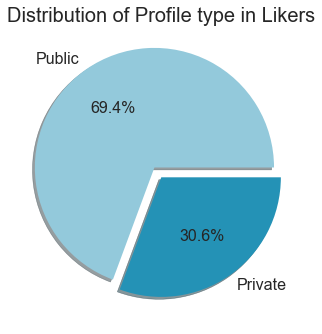

In [30]:
# private profiles in likers
print('Private Likers: ', len(df_likers[df_likers['is_private'] == True]))
print('Public Likers: ', len(df_likers[df_likers['is_private'] == False]))

ax = df_likers['is_private'].value_counts().plot.pie(shadow= True, autopct='%1.1f%%', explode= (0.1, 0),\
                        colors= sns.color_palette('ocean_r')[0:], textprops={'fontsize': 16},\
                                                    labels= ['Public', 'Private'])
ax.set_ylabel('')
ax.set_title('Distribution of Profile type in Likers', fontsize= 20)
plt.savefig('Distribution of Profile type in Likers.png')

### Commenters Data Set

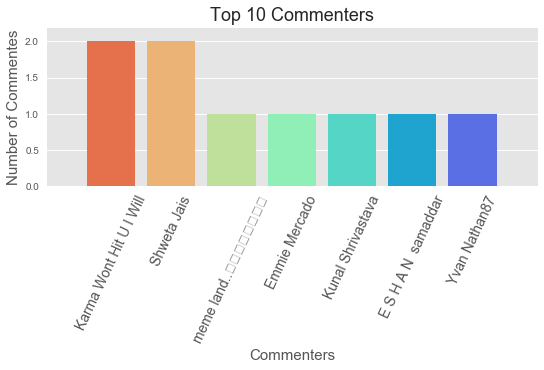

In [31]:
# top 10 commenters
sns.barplot(df_com['full_name'].value_counts().index[:10],df_com['full_name'].value_counts()[:10], \
            palette= 'rainbow_r', orient= 'v')
plt.xlabel('Commenters', fontsize= 15)
plt.ylabel('Number of Commentes', fontsize= 15)
plt.title('Top 10 Commenters', fontsize= 18)
plt.xticks(rotation= 65, fontsize= 14)
plt.margins(0.1)
plt.tight_layout(pad= 2)
plt.savefig('Top 10 Commenters.png')

In [33]:
# save updated data
df_posts.to_csv('posts.csv', index= False)
df_likers.to_csv('likers.csv', index= False)
df_com.to_csv('commenters.csv', index= False)

## Bivariate Analysis

In [54]:
# load data
df_posts = pd.read_csv('posts.csv', parse_dates= ['post_time'])
df_likers = pd.read_csv('likers.csv')
df_com = pd.read_csv('commenters.csv', parse_dates= ['comment_time'])

In [55]:
# remove auto generated columns
df_posts.drop(df_posts.columns[0], axis= 1, inplace= True)
df_likers.drop(df_likers.columns[0], axis= 1, inplace= True)
df_com.drop(df_com.columns[0], axis= 1, inplace= True)

### Posts Data set

In [56]:
df_posts.head()

,id,media_type,filter_type,can_viewer_reshare,caption_is_edited,comment_count,like_count,boosted_status,caption,has_audio,video_duration,view_count,has_reshares,is_post_live,post_time,on_igtv,title_on_igtv,hour,weekday,day_of_month,month
0,2357279277800629678_25061040410,Image,No filter,True,False,0,8,not_boosted,You have no idea,False,0.000,0,False,False,2020-07-20 12:50:09,False,Not_on_igtv,12,0,20,7
1,2357271696930333070_25061040410,Video,No filter,True,False,1,13,unavailable,F*cking awesome,True,23.733,52,False,False,2020-07-20 12:48:52,False,Not_on_igtv,12,0,20,7
2,2357263136808992628_25061040410,Video,No filter,True,False,0,3,unavailable,Robotic hand senitizer,True,48.033,16,False,False,2020-07-20 12:48:47,False,Not_on_igtv,12,0,20,7
3,2357278443578802591_25061040410,Image,No filter,True,False,0,9,not_boosted,NaN,False,0.000,0,False,False,2020-07-20 12:48:30,False,Not_on_igtv,12,0,20,7
4,2357278210442583464_25061040410,Image,No filter,True,False,0,9,not_boosted,Dating an IT guy,False,0.000,0,False,False,2020-07-20 12:48:02,False,Not_on_igtv,12,0,20,7


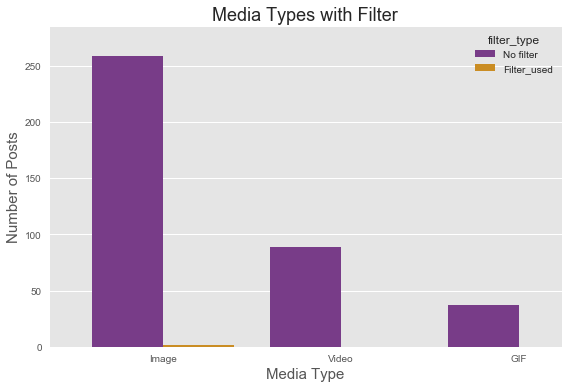

In [69]:
# Filters used in different media types
sns.countplot(x= 'media_type', data= df_posts, hue= 'filter_type', palette= 'CMRmap')
plt.xlabel('Media Type', fontsize= 15)
plt.ylabel('Number of Posts', fontsize= 15)
plt.title('Media Types with Filter', fontsize= 18)
plt.margins(0.1)
plt.tight_layout()
plt.savefig('Media Types with Filter.png')

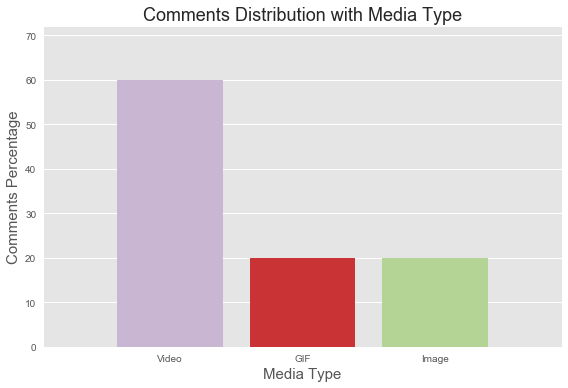

In [98]:
# commentes on different media type
group = df_posts.groupby('media_type').agg({'comment_count': 'sum'})
group.columns = ['total_comments']
group.reset_index(inplace= True)

group['com_perc'] = group['total_comments']/group['total_comments'].sum() * 100

# plot the percentage of comments
sns.barplot(x= 'media_type', y= 'com_perc', data= group.sort_values(by='com_perc', ascending= False),\
            palette= 'Paired_r')
plt.xlabel('Media Type', fontsize= 15)
plt.ylabel('Comments Percentage', fontsize= 15)
plt.title('Comments Distribution with Media Type', fontsize= 18)
plt.margins(0.2)
plt.tight_layout()
plt.savefig('Comments Distribution with Media Type.png')

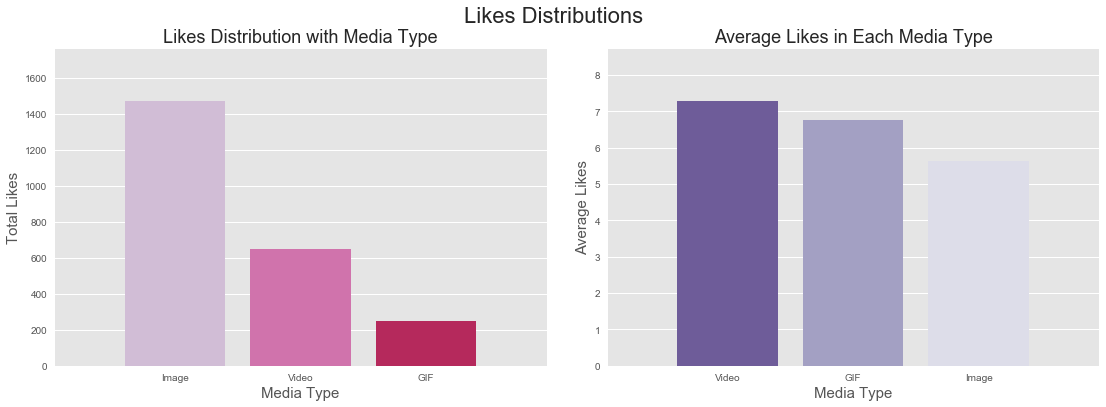

In [121]:
# like counts in different media
group = df_posts.groupby('media_type').agg({'like_count': 'sum'})
group.columns = ['total_likes']
group.reset_index(inplace= True)



fig, ax = plt.subplots(1, 2, figsize= (16, 6))
# plot the percentage of likes
sns.barplot(x= 'media_type', y= 'total_likes', data= group.sort_values(by='total_likes', ascending= False),\
            palette= 'PuRd', ax= ax[0])
ax[0].set_xlabel('Media Type', fontsize= 15)
ax[0].set_ylabel('Total Likes', fontsize= 15)
ax[0].set_title('Likes Distribution with Media Type', fontsize= 18)
ax[0].margins(0.2)
# plot average likes respective to each media type
group = df_posts.groupby('media_type').agg({'like_count': 'mean'})
group.columns = ['average_likes']
group.reset_index(inplace= True)
sns.barplot(x= 'media_type', y= 'average_likes', data= group.sort_values(by='average_likes', ascending= False),\
            palette= 'Purples_r', ax= ax[1])
ax[1].set_xlabel('Media Type', fontsize= 15)
ax[1].set_ylabel('Average Likes', fontsize= 15)
ax[1].set_title('Average Likes in Each Media Type', fontsize= 18)
ax[1].margins(0.2)
fig.suptitle('Likes Distributions', fontsize= 22)
fig.tight_layout(pad= 3)

plt.savefig('Likes Distributions with media type.png')

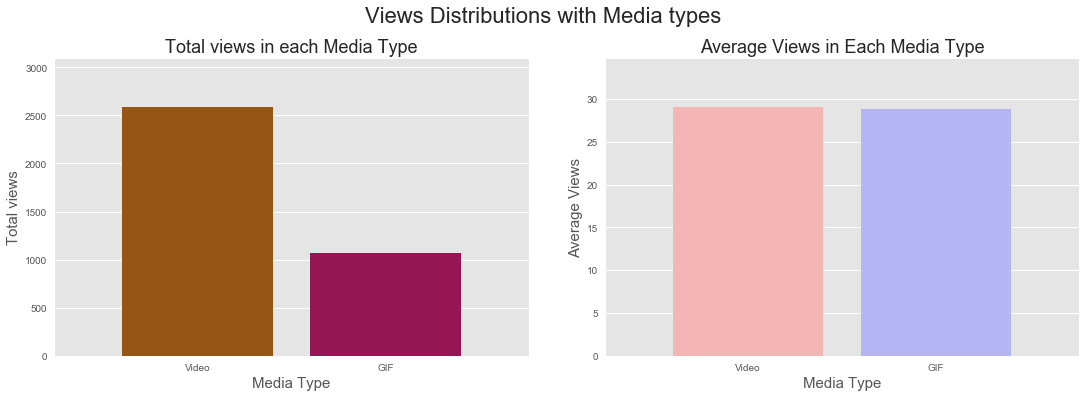

In [134]:
# view count in both video and GIF
group_total = df_posts[df_posts['media_type'] != 'Image'].groupby('media_type').agg({'view_count': 'sum'})
group_total.columns = ['total_views']
group_total.reset_index(inplace= True)

group_avg = df_posts[df_posts['media_type'] != 'Image'].groupby('media_type').agg({'view_count': 'mean'})
group_avg.columns = ['average_views']
group_avg.reset_index(inplace= True)

# plot both distributions
fig, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.barplot(x= 'media_type', y= 'total_views', data= group_total.sort_values(by='total_views', ascending= False),\
            palette= 'brg_r', ax= ax[0])
ax[0].set_xlabel('Media Type', fontsize= 15)
ax[0].set_ylabel('Total views', fontsize= 15)
ax[0].set_title('Total views in each Media Type', fontsize= 18)
ax[0].margins(0.2)

sns.barplot(x= 'media_type', y= 'average_views', data= group_avg.sort_values(by='average_views',\
                            ascending= False), palette= 'bwr_r', ax= ax[1])
ax[1].set_xlabel('Media Type', fontsize= 15)
ax[1].set_ylabel('Average Views', fontsize= 15)
ax[1].set_title('Average Views in Each Media Type', fontsize= 18)
ax[1].margins(0.2)
fig.suptitle('Views Distributions with Media types', fontsize= 22)
fig.tight_layout(pad= 4)
plt.savefig('Views Distributions with media type.png')

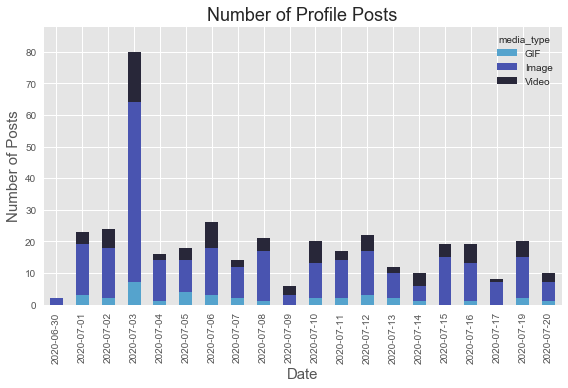

In [402]:
# Number of profile posts per day ( from social breaker)
group = df_posts.groupby(['date', 'media_type']).agg({'id':'count'})
group.reset_index(inplace=True)
group = group.pivot(index='date', columns='media_type', values='id').fillna(0)

group.plot(kind= 'bar', stacked=True, color= sns.color_palette('icefire')[:3])
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Number of Posts', fontsize= 15)
plt.title('Number of Profile Posts', fontsize= 18)
plt.margins(0.1)
plt.tight_layout()
plt.savefig('Number of Profile Posts w.r.t media types.png')

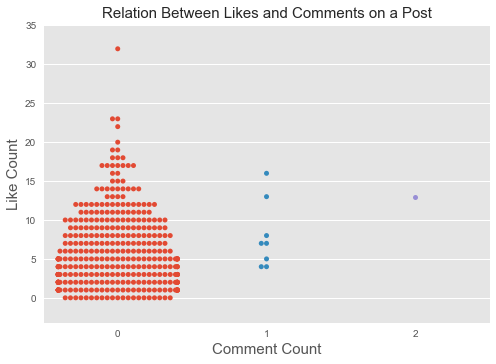

In [135]:
# comment relation with likes
sns.swarmplot(x= 'comment_count', y= 'like_count', data= df_posts)
plt.xlabel('Comment Count', fontsize= 15)
plt.ylabel('Like Count', fontsize= 15)
plt.title('Relation Between Likes and Comments on a Post', fontsize= 15)
plt.margins(0.1)
plt.savefig('Relation Between Likes and Comments on a Post.png')

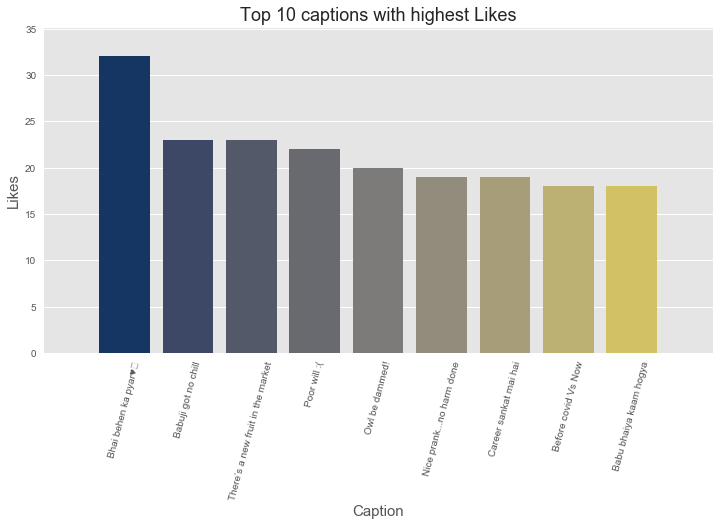

In [161]:
# captions used in top liked posts
mask_top_cap = df_posts['like_count'] > df_posts['like_count'].sort_values(ascending= False).values[10]
fig, ax= plt.subplots(1, 1, figsize= (12,6))
ax = sns.barplot(x= 'caption',y= 'like_count',\
            data= df_posts[mask_top_cap].sort_values(by= 'like_count', ascending= False),\
            palette= 'cividis', ax= ax)
plt.xlabel('Caption', fontsize= 15)
plt.ylabel('Likes', fontsize= 15)
plt.title('Top 10 captions with highest Likes', fontsize= 18)
plt.margins(0.1)
plt.xticks(rotation= 75)
plt.savefig('Top 10 captions with highest Likes.png')

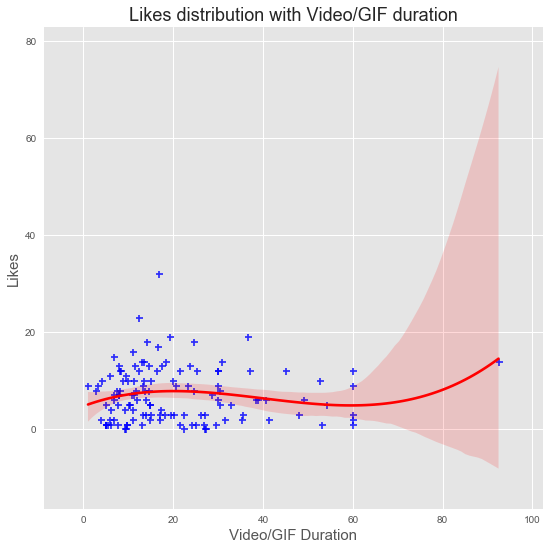

In [205]:
# video duration Vs likes
def vid_dur(dur):
    if dur < 10:
        return '10 sec video'
    elif dur < 20:
        return '20 sec video'
    elif dur < 30:
        return '30 sec video'
    elif dur < 60:
        return '1 minute video'
    
videos['cat'] = videos['video_duration'].apply(lambda x: vid_dur(x))
videos = df_posts[df_posts['video_duration'] > 0]
sns.lmplot(x= 'video_duration', y= 'like_count', data= videos,\
                 markers= '+', scatter_kws= {'color': 'blue'}, line_kws= {'color': "red"}, order= 3, size=8)
plt.xlabel('Video/GIF Duration', fontsize= 15)
plt.ylabel('Likes', fontsize= 15)
plt.title('Likes distribution with Video/GIF duration', fontsize= 18)
plt.margins(0.1)
plt.tight_layout(pad= 2)
plt.savefig('Likes distribution with Video or GIF duration.png')

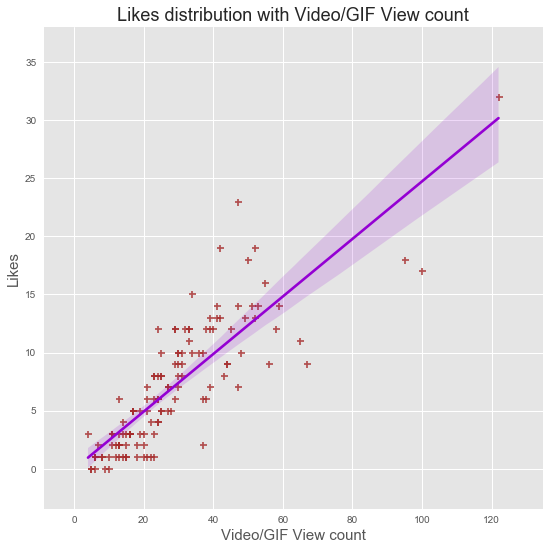

In [208]:
# view counts Vs likes
videos = df_posts[df_posts['media_type'] != 'Image']
sns.lmplot(x= 'view_count', y= 'like_count', data= videos,\
                 markers= '+', scatter_kws= {'color': 'brown'}, line_kws= {'color': "darkviolet"}, order= 1, size=8)
plt.xlabel('Video/GIF View count', fontsize= 15)
plt.ylabel('Likes', fontsize= 15)
plt.title('Likes distribution with Video/GIF View count', fontsize= 18)
plt.margins(0.1)
plt.tight_layout(pad= 2)
plt.savefig('Likes distribution with Video or GIF View count.png')

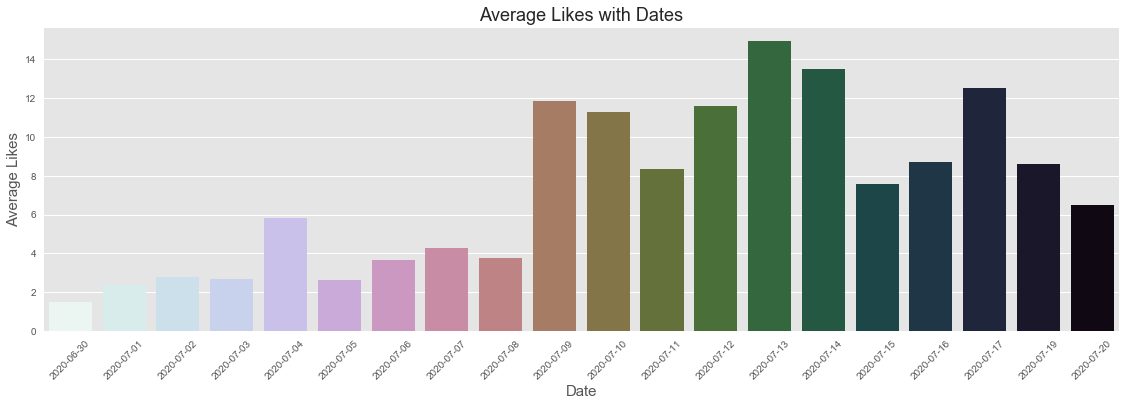

In [242]:
# like counts with the date
group = df_posts.groupby('date').agg({'like_count': 'mean'})
group.columns= ['avg_likes']
group.reset_index(inplace= True)

fig, ax= plt.subplots(1, 1, figsize= (16, 6))
sns.barplot(x= 'date', y= 'avg_likes', data= group, palette= 'cubehelix_r', ax= ax)
plt.xticks(rotation= 45)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Average Likes', fontsize= 15)
plt.title('Average Likes with Dates', fontsize= 18)
plt.tight_layout(pad= 2)
plt.savefig('Average Likes with Dates.png')

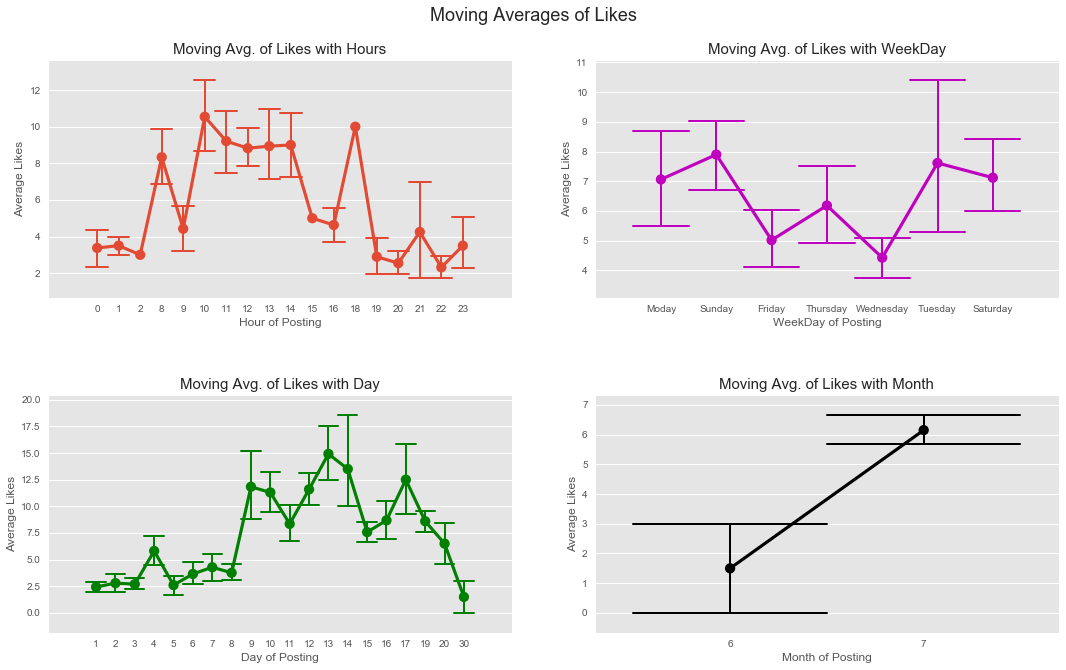

In [352]:
# moving average of likes with hour, weekday, monthday adn month
fig, ax = plt.subplots(2, 2, figsize= (16, 10))
# hour
sns.pointplot(x= 'hour', y= 'like_count', data= df_posts, ax= ax[0][0], errwidth= 2, capsize= 1)
ax[0][0].set_xlabel('Hour of Posting', fontsize= 12)
ax[0][0].set_ylabel('Average Likes', fontsize= 12)
ax[0][0].set_title('Moving Avg. of Likes with Hours', fontsize= 15)
ax[0][0].margins(0.1)

# weekday
sns.pointplot(x= 'weekday', y= 'like_count', data= df_posts, ax= ax[0][1], errwidth= 2, capsize= 1, color= 'm')
ax[0][1].set_xlabel('WeekDay of Posting', fontsize= 12)
ax[0][1].set_ylabel('Average Likes', fontsize= 12)
ax[0][1].set_title('Moving Avg. of Likes with WeekDay', fontsize= 15)
ax[0][1].margins(0.1)

# day of month
sns.pointplot(x= 'day_of_month', y= 'like_count', data= df_posts, ax= ax[1][0], errwidth= 2, capsize= 1, color= 'g')
ax[1][0].set_xlabel('Day of Posting', fontsize= 12)
ax[1][0].set_ylabel('Average Likes', fontsize= 12)
ax[1][0].set_title('Moving Avg. of Likes with Day', fontsize= 15)
ax[1][0].margins(0.1)

# month 
sns.pointplot(x= 'month', y= 'like_count', data= df_posts, ax= ax[1][1], errwidth= 2, capsize= 1, color= 'black')
ax[1][1].set_xlabel('Month of Posting', fontsize= 12)
ax[1][1].set_ylabel('Average Likes', fontsize= 12)
ax[1][1].set_title('Moving Avg. of Likes with Month', fontsize= 15)
ax[1][1].margins(0.1)

fig.suptitle('Moving Averages of Likes', fontsize= 18)
plt.tight_layout(pad= 5)
plt.savefig('Moving Averages of Likes.png')

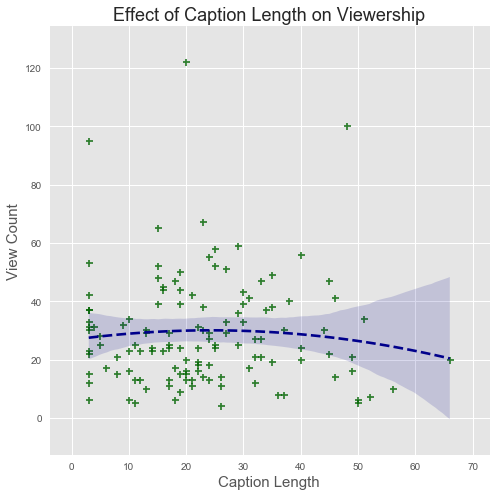

In [321]:
# Caption length Vs view count
videos['caption_len'] = videos['caption'].apply(lambda x: len(str(x)))

sns.lmplot(x= 'caption_len', y= 'view_count', data= videos, size= 7, order= 2,\
           scatter_kws={'color': 'darkgreen'}, line_kws= {'color': 'darkblue', 'linestyle': '--'},\
           markers= '+')
plt.xlabel('Caption Length', fontsize= 15)
plt.ylabel('View Count', fontsize= 15)
plt.title('Effect of Caption Length on Viewership', fontsize= 18)
plt.margins(0.1)
plt.tight_layout()
plt.savefig('Effect of Caption Length on Viewership.png')

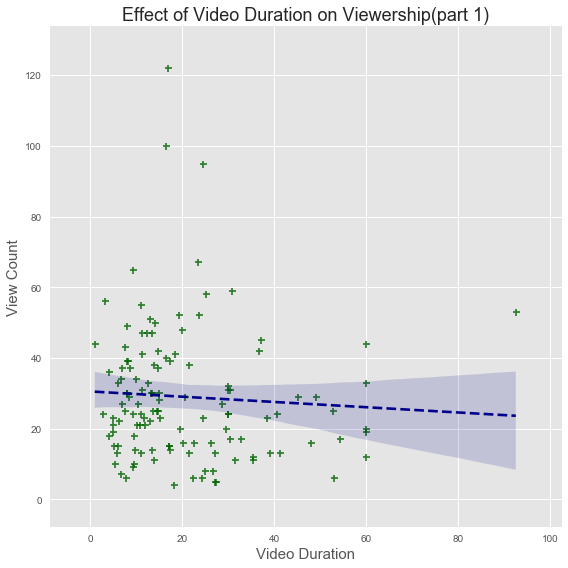

In [339]:
# Video duration with views
sns.lmplot(x= 'video_duration', y= 'view_count', data= videos, size= 8, order= 1,\
           scatter_kws={'color': 'darkgreen'}, line_kws= {'color': 'darkblue', 'linestyle': '--'},\
           markers= '+')
plt.xlabel('Video Duration', fontsize= 15)
plt.ylabel('View Count', fontsize= 15)
plt.title('Effect of Video Duration on Viewership(part 1)', fontsize= 18)
plt.margins(0.1)
plt.tight_layout()
plt.savefig('Effect of Video Duration on Viewership(part 1).png')

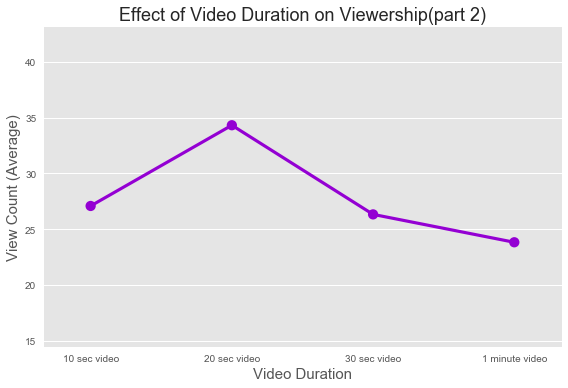

In [346]:
# same plot with binning
sns.pointplot(x='cat', y= 'view_count', data= videos, order= ['10 sec video',\
'20 sec video', '30 sec video', '1 minute video'], color= 'darkviolet', errwidth= 0)
plt.xlabel('Video Duration', fontsize= 15)
plt.ylabel('View Count (Average)', fontsize= 15)
plt.title('Effect of Video Duration on Viewership(part 2)', fontsize= 18)
plt.margins(0.1)
plt.tight_layout()
plt.savefig('Effect of Video Duration on Viewership(part 2).png')

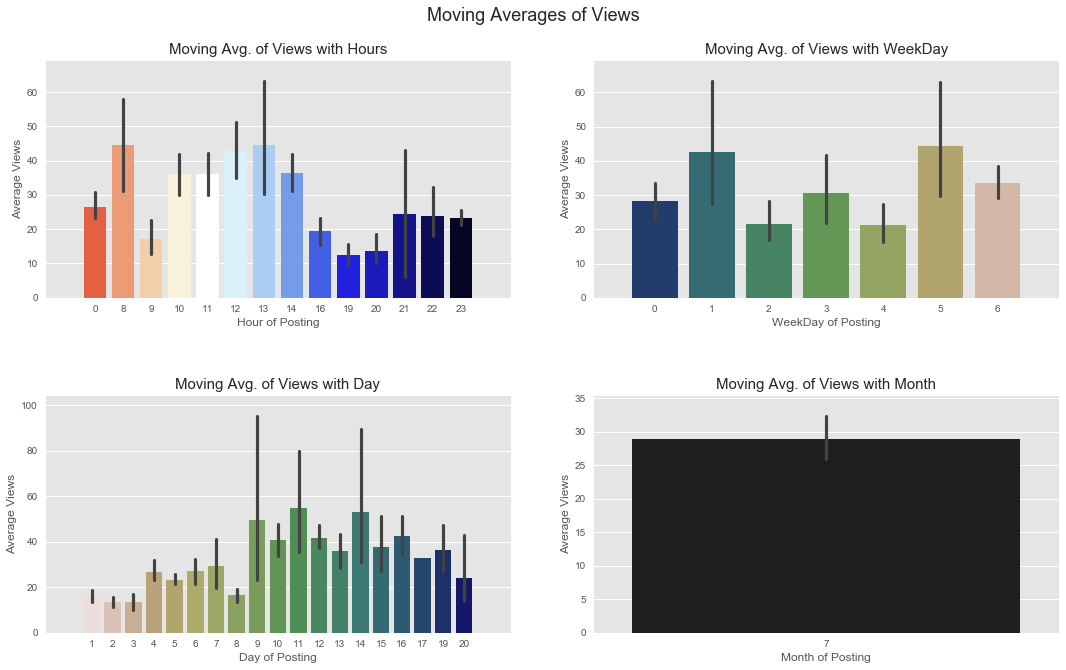

In [353]:
# Moving avg of view counts
fig, ax = plt.subplots(2, 2, figsize= (16, 10))
# hour
sns.barplot(x= 'hour', y= 'view_count', data= videos, ax= ax[0][0],palette= 'flag')
ax[0][0].set_xlabel('Hour of Posting', fontsize= 12)
ax[0][0].set_ylabel('Average Views', fontsize= 12)
ax[0][0].set_title('Moving Avg. of Views with Hours', fontsize= 15)
ax[0][0].margins(0.1)

# weekday
sns.barplot(x= 'weekday', y= 'view_count', data= videos, ax= ax[0][1], palette= 'gist_earth')
ax[0][1].set_xlabel('WeekDay of Posting', fontsize= 12)
ax[0][1].set_ylabel('Average Views', fontsize= 12)
ax[0][1].set_title('Moving Avg. of Views with WeekDay', fontsize= 15)
ax[0][1].margins(0.1)

# day of month
sns.barplot(x= 'day_of_month', y= 'view_count', data= videos, ax= ax[1][0], palette= 'gist_earth_r')
ax[1][0].set_xlabel('Day of Posting', fontsize= 12)
ax[1][0].set_ylabel('Average Views', fontsize= 12)
ax[1][0].set_title('Moving Avg. of Views with Day', fontsize= 15)
ax[1][0].margins(0.1)

# month 
sns.barplot(x= 'month', y= 'view_count', data= videos, ax= ax[1][1], palette= 'icefire')
ax[1][1].set_xlabel('Month of Posting', fontsize= 12)
ax[1][1].set_ylabel('Average Views', fontsize= 12)
ax[1][1].set_title('Moving Avg. of Views with Month', fontsize= 15)
ax[1][1].margins(0.1)

fig.suptitle('Moving Averages of Views', fontsize= 18)
plt.tight_layout(pad= 5)
plt.savefig('Moving Averages of Views.png')

## Ideas from net

In [403]:
# followers and following
bot = Bot(max_likes_per_day = 0,
         max_unlikes_per_day  = 0,
         max_follows_per_day  = 0,
         max_unfollows_per_day  = 0,
         max_comments_per_day  = 0,
         max_likes_to_like  = 0,
         filter_users = False,
         filter_business_accounts  = False,
         filter_verified_accounts  = False,
         save_logfile= False)
bot.login(username="Cant show here", password="*******")

2020-07-22 22:51:22,050 - INFO - Instabot version: 0.117.0 Started
2020-07-22 22:51:22,079 - INFO - Recovery from C:\Users\Aman\Henchman\memes_you_see_before_bed/config/memes_you_see_before_bed_uuid_and_cookie.json: COOKIE True - UUIDs True - TIMING, DEVICE and ...
- user-agent=Instagram 117.0.0.28.123 Android (28/9.0; 420dpi; 1080x1920; OnePlus; ONEPLUS A3003; OnePlus3; qcom; en_US; 180322800)
- phone_id=e9edbaa3-dde6-4417-953c-c9876665341a
- uuid=798d1002-e17f-4385-8d0b-d42562f8ac75
- client_session_id=4ed2c57c-8a0a-47c6-9a00-e15746d88e1c
- device_id=android-31bb5b1f1e1f8a2d
2020-07-22 22:51:22,082 - INFO - LOGIN FLOW! Just logged-in: False
2020-07-22 22:51:23,772 - ERROR - Request returns 403 error!
2020-07-22 22:51:24,213 - ERROR - Request returns 403 error!
2020-07-22 22:51:24,805 - ERROR - Request returns 403 error!
2020-07-22 22:51:25,321 - ERROR - Request returns 403 error!
2020-07-22 22:51:25,843 - ERROR - Request returns 403 error!
2020-07-22 22:51:26,314 - ERROR - Request re

True

In [405]:
my_id = bot.get_user_id_from_username('cant show here')
time.sleep(2)
followers = bot.get_user_followers(my_id)
time.sleep(2)
following = bot.get_user_following(my_id)

Getting followings of 25061040410: 100%|██████████| 1215/1215 [00:03<00:00, 347.07it/s]


In [406]:
not_follow_back = set(following) - set(followers)
fans = set(followers) - set(following)

In [407]:
print('Number of Followers: ', len(followers))
print('Number of Follwoing: ', len(following))
print('Number of people not following back: ', len(not_follow_back))
print('Number of Fans: ', len(fans))

Number of Followers:  1138
Number of Follwoing:  1215
Number of people not following back:  921
Number of Fans:  844


In [408]:
# Engagement rate( in % ) and interactions per post( pct of people inetracting with your posts )
# Intagram puts high ER posts in top in user's feed ( imp point )
df_posts['eng_rate'] = ((df_posts['like_count'] + df_posts['comment_count'])/len(followers)) * 100

Average interaction per post:  6.149870801033591
Average Engagement rate per post:  0.5404104394581376


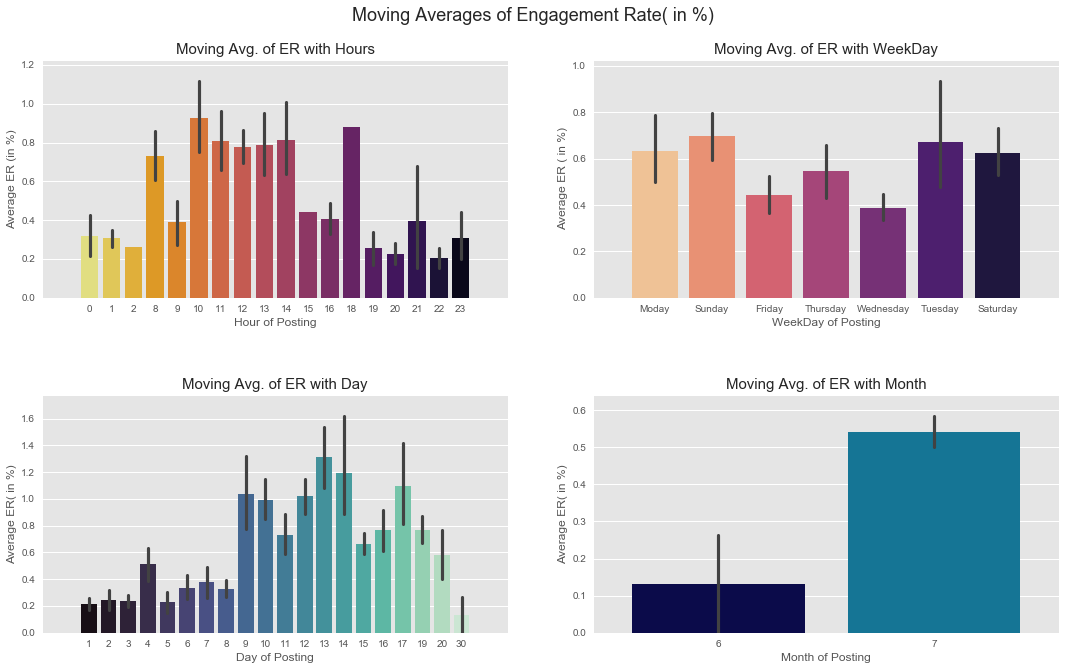

In [413]:
print('Average Engagement rate per post: ', df_posts['eng_rate'].mean())
# ER moving averages
fig, ax = plt.subplots(2, 2, figsize= (16, 10))
# hour
sns.barplot(x= 'hour', y= 'eng_rate', data= df_posts, ax= ax[0][0],palette= 'inferno_r')
ax[0][0].set_xlabel('Hour of Posting', fontsize= 12)
ax[0][0].set_ylabel('Average ER (in %)', fontsize= 12)
ax[0][0].set_title('Moving Avg. of ER with Hours', fontsize= 15)
ax[0][0].margins(0.1)

# weekday
sns.barplot(x= 'weekday', y= 'eng_rate', data= df_posts, ax= ax[0][1], palette= 'magma_r')
ax[0][1].set_xlabel('WeekDay of Posting', fontsize= 12)
ax[0][1].set_ylabel('Average ER ( in %)', fontsize= 12)
ax[0][1].set_title('Moving Avg. of ER with WeekDay', fontsize= 15)
ax[0][1].margins(0.1)

# day of month
sns.barplot(x= 'day_of_month', y= 'eng_rate', data= df_posts, ax= ax[1][0], palette= 'mako')
ax[1][0].set_xlabel('Day of Posting', fontsize= 12)
ax[1][0].set_ylabel('Average ER( in %)', fontsize= 12)
ax[1][0].set_title('Moving Avg. of ER with Day', fontsize= 15)
ax[1][0].margins(0.1)

# month 
sns.barplot(x= 'month', y= 'eng_rate', data= df_posts, ax= ax[1][1], palette= 'ocean')
ax[1][1].set_xlabel('Month of Posting', fontsize= 12)
ax[1][1].set_ylabel('Average ER( in %)', fontsize= 12)
ax[1][1].set_title('Moving Avg. of ER with Month', fontsize= 15)
ax[1][1].margins(0.1)

fig.suptitle('Moving Averages of Engagement Rate( in %)', fontsize= 18)
plt.tight_layout(pad= 5)
plt.savefig('Moving Averages of Engagement Rate( in %).png')

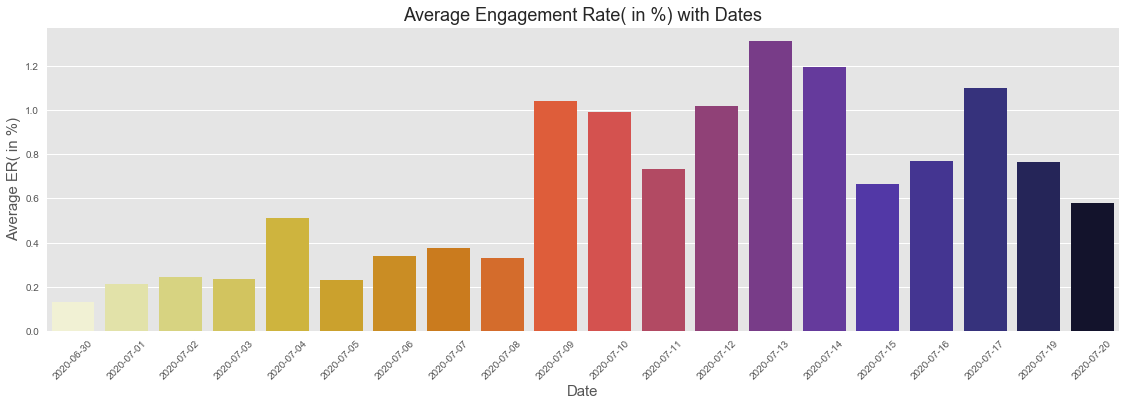

In [418]:
# ER  per post
group = df_posts.groupby('date').agg({'eng_rate': 'mean'})
group.columns= ['avg_er']
group.reset_index(inplace= True)

fig, ax= plt.subplots(1, 1, figsize= (16, 6))
sns.barplot(x= 'date', y= 'avg_er', data= group, palette= 'CMRmap_r', ax= ax)
plt.xticks(rotation= 45)
plt.xlabel('Date', fontsize= 15)
plt.ylabel('Average ER( in %)', fontsize= 15)
plt.title('Average Engagement Rate( in %) with Dates', fontsize= 18)
plt.tight_layout(pad= 2)
plt.savefig('Average Engagement Rate( in %) with Dates.png')

In [420]:
# save the updated data
df_posts.to_csv('posts.csv', index= False)
df_likers.to_csv('likers.csv', index= False)
df_com.to_csv('commenters.csv', index= False)

In [419]:
# Dont forget to logout !!!!!!!!!!
bot.logout()

2020-07-22 23:30:40,133 - INFO - Bot stopped. Worked: 2 days, 1:20:29.496108
2020-07-22 23:30:40,141 - INFO - Total requests: 52
